# 

In [1]:
import pyreadr
import numpy as np
import pandas as pd
import swifter
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np
import scipy.stats as stats
from scipy.linalg import eigh
import pickle
from itertools import product

In [17]:
from fault_detection_algorithms.PCAFaultDetector import PCAFaultDetector
from fault_detection_algorithms.fault_detector import BaseFaultDetectionAlgorithm 
from utils_ import plot_all_roc_curves

In [18]:
from fast_dataset_open import open_with_cache

In [23]:
import importlib
import fault_detection_algorithms.PCAFaultDetector
import fault_detection_algorithms.fault_detector
import utils_

importlib.reload(fault_detection_algorithms.PCAFaultDetector)
importlib.reload(fault_detection_algorithms.fault_detector)
importlib.reload(utils_)

from fault_detection_algorithms.PCAFaultDetector import PCAFaultDetector
from fault_detection_algorithms.fault_detector import BaseFaultDetectionAlgorithm
from utils_ import plot_all_roc_curves


In [5]:
# constants
datasets_dir = "datasets"
dataset_dir = f"./{datasets_dir}/TEP/"

In [6]:
test_df = open_with_cache(f"{dataset_dir}/TEP_Faulty_Testing.RData", f"{dataset_dir}/TEP_FaultFree_Testing.RData")

Loading from cache: cache_data/38ed105d1e51ef36e954d9df89414b6e.pkl


In [7]:
model = BaseFaultDetectionAlgorithm.load("models/pca_fault_detector.pickle")
model

In [8]:
x_test = test_df.values[:, 3:]

In [9]:
expected_fault = test_df["sample"]>160
expected_fault[test_df["faultNumber"]==0] = False# non faulty test

In [10]:
result = model.evaluate(x_test, expected_fault, test_df["faultNumber"], roc_curve=True)

/home/usuario/GhentInternship/fault_detection_algorithms/fault_detector.py:88: RuntimeWarning: invalid value encountered in scalar divide
  fault_detection_rate = TP/(TP+FN)


computing roc curve data
computing roc initial steps
iterating over thresholds
iterating over thresholds: 0.01
iterating over thresholds: 0.02
iterating over thresholds: 0.03
iterating over thresholds: 0.04
iterating over thresholds: 0.05
iterating over thresholds: 0.06
iterating over thresholds: 0.07
iterating over thresholds: 0.08
iterating over thresholds: 0.09
iterating over thresholds: 0.1
iterating over thresholds: 0.11
iterating over thresholds: 0.12
iterating over thresholds: 0.13
iterating over thresholds: 0.14
iterating over thresholds: 0.15
iterating over thresholds: 0.16
iterating over thresholds: 0.17
iterating over thresholds: 0.18
iterating over thresholds: 0.19
iterating over thresholds: 0.2
iterating over thresholds: 0.21
iterating over thresholds: 0.22
iterating over thresholds: 0.23
iterating over thresholds: 0.24
iterating over thresholds: 0.25
iterating over thresholds: 0.26
iterating over thresholds: 0.27
iterating over thresholds: 0.28
iterating over thresholds: 

/home/usuario/GhentInternship/fault_detection_algorithms/fault_detector.py:90: RuntimeWarning: invalid value encountered in scalar divide
  false_detection_rate= FP/(TP+FP)
/home/usuario/GhentInternship/fault_detection_algorithms/fault_detector.py:88: RuntimeWarning: invalid value encountered in scalar divide
  fault_detection_rate = TP/(TP+FN)


computing threshold by fault
iterating over faults: 0.047619047619047616
iterating over faults: 0.09523809523809523
iterating over faults: 0.14285714285714285
iterating over faults: 0.19047619047619047
iterating over faults: 0.23809523809523808
iterating over faults: 0.2857142857142857
iterating over faults: 0.3333333333333333
iterating over faults: 0.38095238095238093
iterating over faults: 0.42857142857142855
iterating over faults: 0.47619047619047616
iterating over faults: 0.5238095238095238
iterating over faults: 0.5714285714285714
iterating over faults: 0.6190476190476191
iterating over faults: 0.6666666666666666
iterating over faults: 0.7142857142857143
iterating over faults: 0.7619047619047619
iterating over faults: 0.8095238095238095
iterating over faults: 0.8571428571428571
iterating over faults: 0.9047619047619048
iterating over faults: 0.9523809523809523
iterating over faults: 1.0


In [11]:
for fault_num, metrics in result["by_fault"].items():
    
    print(f"Fault: {fault_num}")
    if fault_num==0:
        print(f"FAR(false alarm rate) {metrics['False Alarm Rate']}" )
    else:
        print(f"TDR(fault detection rate) {metrics['Fault Detection Rate']}" )
        print(f"FDR(false detection rate) {metrics['False Detection Rate']}" )
    print()

    


Fault: 0
FAR(false alarm rate) 0.010441666666666667

Fault: 1
TDR(fault detection rate) 0.994925
FDR(false detection rate) 0.0012723444514990828

Fault: 2
TDR(fault detection rate) 0.986905
FDR(false detection rate) 0.0012826707887539878

Fault: 3
TDR(fault detection rate) 0.01129
FDR(false detection rate) 0.10093569579932311

Fault: 4
TDR(fault detection rate) 0.720645
FDR(false detection rate) 0.0017557529478988104

Fault: 5
TDR(fault detection rate) 0.237
FDR(false detection rate) 0.005319651232333407

Fault: 6
TDR(fault detection rate) 1.0
FDR(false detection rate) 0.0012658954774822913

Fault: 7
TDR(fault detection rate) 1.0
FDR(false detection rate) 0.0012658954774822913

Fault: 8
TDR(fault detection rate) 0.9704525
FDR(false detection rate) 0.001304388095336105

Fault: 9
TDR(fault detection rate) 0.0116025
FDR(false detection rate) 0.09848484848484848

Fault: 10
TDR(fault detection rate) 0.18862
FDR(false detection rate) 0.006675004937133829

Fault: 11
TDR(fault detection rate) 

In [13]:
fault_id = 3 
fault_det_rate = result["roc_data"]["global"]["Fault Detection Rate"]
false_alarm_rate = result["roc_data"]["global"]["False Alarm Rate"]

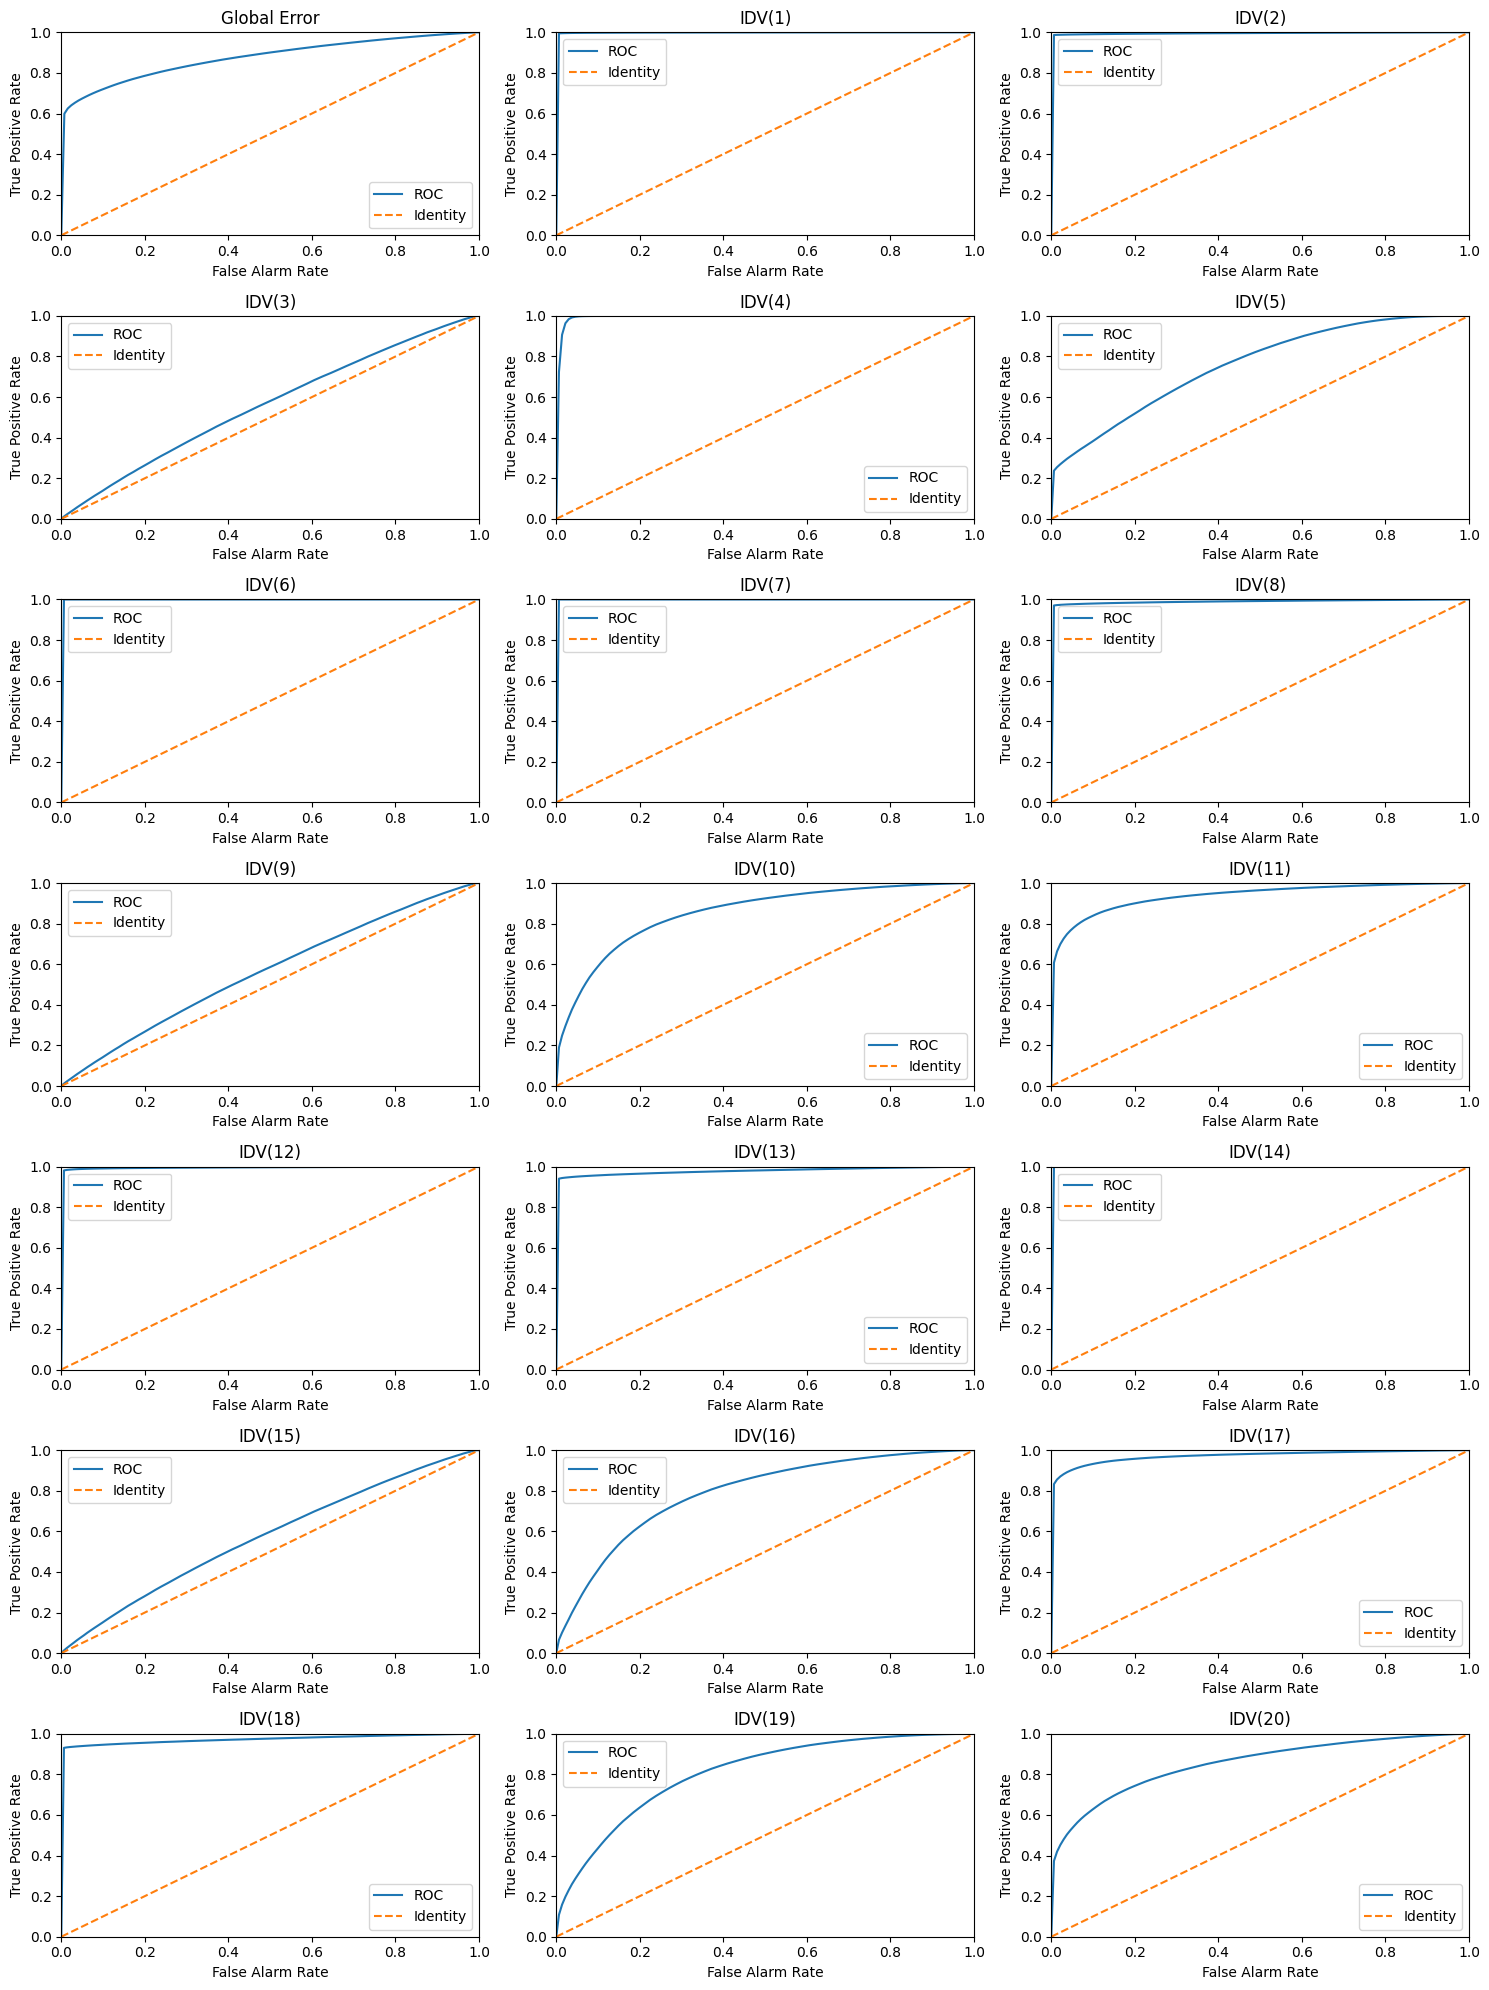

In [24]:
plot_all_roc_curves(result["roc_data"])